In [1]:
# Import Libraries
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline

In [2]:
# Check the current directory where the Python program is executing from
print(f"Current Working Directory: {Path.cwd()}")

Current Working Directory: /Users/wilsonquizhpi/Homework-unite-4


In [3]:
# Read CSV
sp500_history_path = Path('sp500_history.csv')
algo_returns_path = Path('algo_returns.csv')
whale_retuns_path = Path('whale_returns.csv')

In [4]:
# Read in data and index by Date
sp500_history_df = pd.read_csv(sp500_history_path, index_col="Date")
sp500_history_df.head()

,Close
Date,
23-Apr-19,$2933.68
22-Apr-19,$2907.97
18-Apr-19,$2905.03
17-Apr-19,$2900.45
16-Apr-19,$2907.06


In [5]:
# Replacing the name Close to S&P 500 so we can have a good name
sp500_history_df.rename(columns={'Close': 'S&P 500'}, inplace=True)
sp500_history_df.head()

,S&P 500
Date,
23-Apr-19,$2933.68
22-Apr-19,$2907.97
18-Apr-19,$2905.03
17-Apr-19,$2900.45
16-Apr-19,$2907.06


In [6]:
# dropping the $ sing because it does not allow to work becuase it is a string
sp500_history_df['S&P 500'] = sp500_history_df['S&P 500'].str.replace("$", " ")
sp500_history_df.head()

/var/folders/yw/s7_xdw_d6p9231wbk6jwlsvm0000gn/T/ipykernel_8404/1582236261.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_history_df['S&P 500'] = sp500_history_df['S&P 500'].str.replace("$", " ")


,S&P 500
Date,
23-Apr-19,2933.68
22-Apr-19,2907.97
18-Apr-19,2905.03
17-Apr-19,2900.45
16-Apr-19,2907.06


In [7]:
# going to string to float 
sp500_history_df['S&P 500'] = sp500_history_df['S&P 500'].astype('float')
sp500_history_df.dtypes

S&P 500    float64
dtype: object

In [8]:
# Changing the daate fromat
from datetime import datetime
sp500_history_df.index = pd.to_datetime(sp500_history_df.index)
sp500_history_df.index = sp500_history_df.index.strftime('%Y/%m/%d')
sp500_history_df.head()

,S&P 500
Date,
2019/04/23,2933.68
2019/04/22,2907.97
2019/04/18,2905.03
2019/04/17,2900.45
2019/04/16,2907.06


In [9]:
# Read in data and index by Date
algo_returns_df = pd.read_csv(algo_returns_path, index_col="Date")
algo_returns_df.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [10]:
# Check for nulls
algo_returns_df.isnull().sum
#Drop missing values
algo_returns_df = algo_returns_df.dropna()
# Rechecking
algo_returns_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             Algo 1  Algo 2
Date                      
2014-06-05   False   False
2014-06-06   False   False
2014-06-09   False   False
2014-06-10   False   False
2014-06-11   False   False
...            ...     ...
2019-04-25   False   False
2019-04-26   False   False
2019-04-29   False   False
2019-04-30   False   False
2019-05-01   False   False

[1235 rows x 2 columns]>

In [11]:
# Changing the daate fromat
from datetime import datetime
algo_returns_df.index = pd.to_datetime(algo_returns_df.index)
algo_returns_df.index = algo_returns_df.index.strftime('%Y/%m/%d')
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014/06/05,0.004062,0.013285
2014/06/06,0.001857,0.008284
2014/06/09,-0.005012,0.005668
2014/06/10,0.004406,-0.000735
2014/06/11,0.004760,-0.003761


In [12]:
# Calculate daily returns
sp500_history_return = sp500_history_df.pct_change()
sp500_history_return.head()

,S&P 500
Date,
2019/04/23,NaN
2019/04/22,-0.008764
2019/04/18,-0.001011
2019/04/17,-0.001577
2019/04/16,0.002279


In [13]:
# Check for nulls
sp500_history_df.isnull().sum
#Drop missing values
sp500_history_df = sp500_history_df.dropna()
# Rechecking
sp500_history_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             S&P 500
Date               
2019/04/23    False
2019/04/22    False
2019/04/18    False
2019/04/17    False
2019/04/16    False
...             ...
2012/10/05    False
2012/10/04    False
2012/10/03    False
2012/10/02    False
2012/10/01    False

[1649 rows x 1 columns]>

In [14]:
# Read in data and index by Date
whale_retuns_df = pd.read_csv(whale_retuns_path, index_col="Date")
whale_retuns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [15]:
# Check for nulls
whale_retuns_df.isnull().sum
#Drop missing values
whale_retuns_df = whale_retuns_df.dropna()
# Rechecking 
whale_retuns_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                      False               False   
2015-03-04                      False               False   
2015-03-05                      False               False   
2015-03-06                      False               False   
2015-03-09                      False               False   
...                               ...                 ...   
2019-04-25                      False               False   
2019-04-26                      False               False   
2019-04-29                      False               False   
2019-04-30                      False               False   
2019-05-01                      False               False   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03  

In [16]:
# Changing the daate fromat
from datetime import datetime
whale_retuns_df.index = pd.to_datetime(whale_retuns_df.index)
whale_retuns_df.index = whale_retuns_df.index.strftime('%Y/%m/%d')
whale_retuns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015/03/03,-0.001266,-0.004981,-0.000496,-0.006569
2015/03/04,0.002230,0.003241,-0.002534,0.004213
2015/03/05,0.004016,0.004076,0.002355,0.006726
2015/03/06,-0.007905,-0.003574,-0.008481,-0.013098
2015/03/09,0.000582,0.004225,0.005843,-0.001652


In [17]:
# Join sp500_history_return, whale_retuns_df, and algo_returns_df full datasets by axis
joined_data_rows = pd.concat([whale_retuns_df, algo_returns_df, sp500_history_return], axis="columns", join="inner")
joined_data_rows.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015/03/03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015/03/04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015/03/05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015/03/06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015/03/09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


<AxesSubplot:title={'center':'daily returns for S&P 500'}, xlabel='Date'>

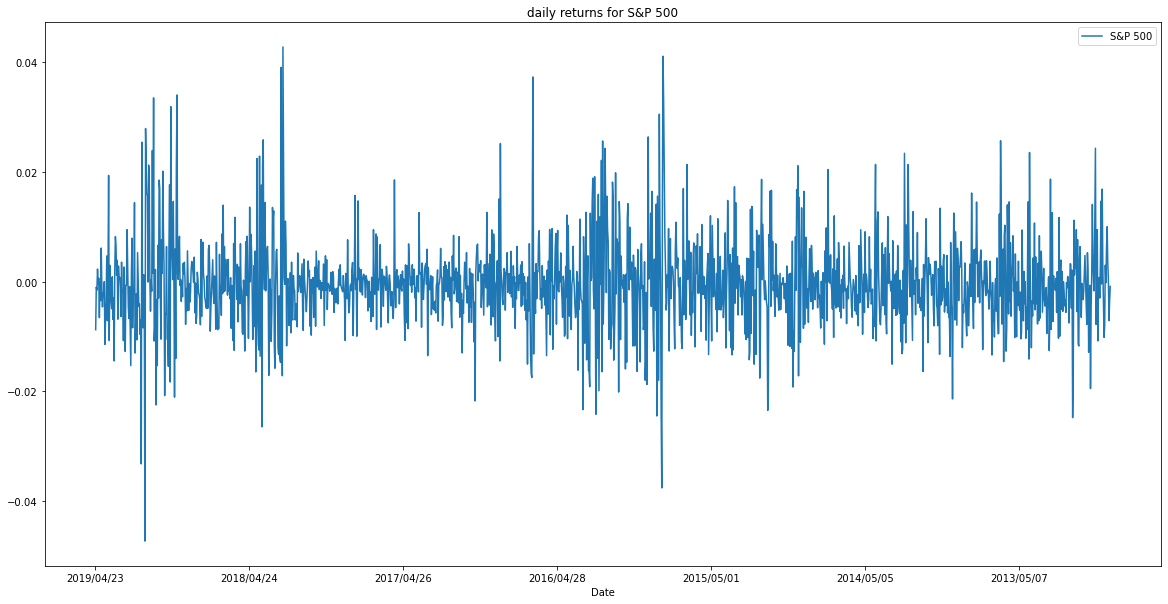

In [18]:
# Plot the daily returns of S&P 500
sp500_history_return.plot(figsize=(20,10), title= "daily returns for S&P 500")

<AxesSubplot:title={'center':'daily returns for algo '}, xlabel='Date'>

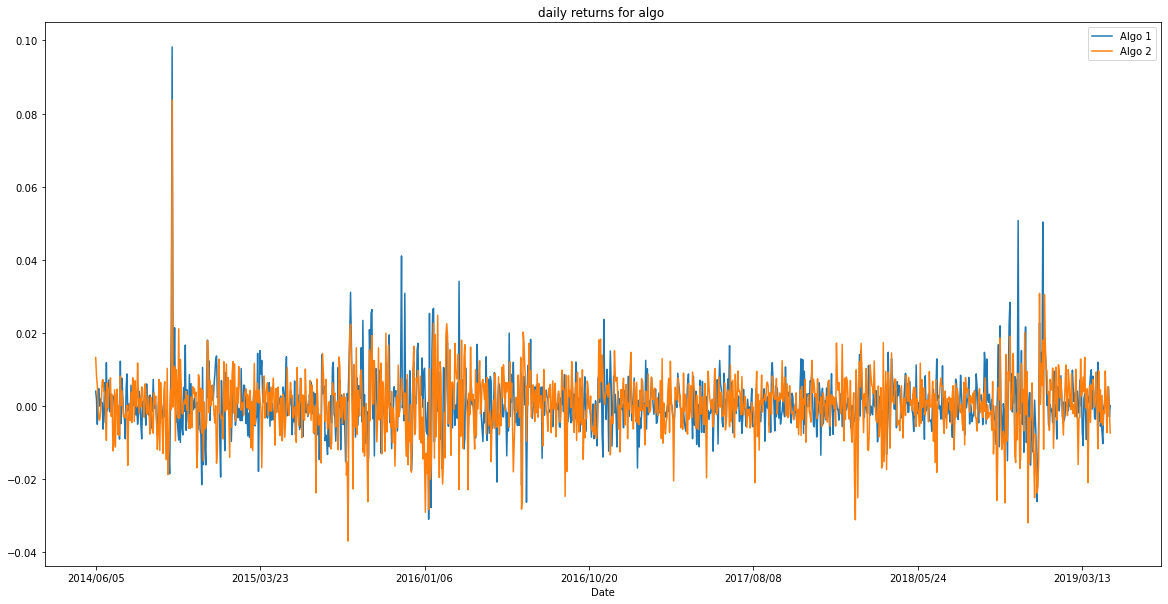

In [19]:
# Plot the daily returns of algo
algo_returns_df.plot(figsize=(20,10), title= "daily returns for algo ")

<AxesSubplot:title={'center':'daily returns for algo '}, xlabel='Date'>

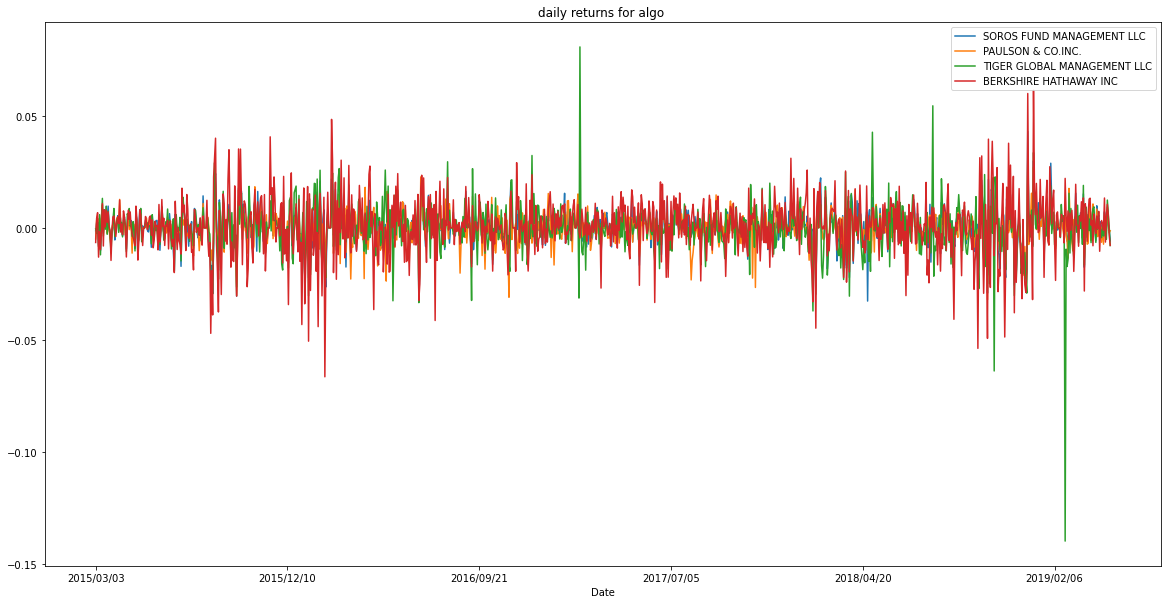

In [20]:
whale_retuns_df.plot(figsize=(20,10), title= "daily returns for algo ")